In [4]:
import pandas as pd
import numpy as np

In [3]:
train = pd.read_csv('train.csv')
b_keyword = pd.read_csv('brand_keyword_cnt.csv')
sales = pd.read_csv('sales.csv')
#prd_info = pd.read_csv('./data/product_info.csv')
keywords = pd.read_csv('keyword.csv')

In [34]:
train2 = train.copy()

In [48]:
train.head()

,ID,제품,대분류,중분류,소분류,브랜드,2022-01-01,2022-01-02,2022-01-03,2022-01-04,...,2023-03-26,2023-03-27,2023-03-28,2023-03-29,2023-03-30,2023-03-31,2023-04-01,2023-04-02,2023-04-03,2023-04-04
0,0,B002-00001-00001,B002-C001-0002,B002-C002-0007,B002-C003-0038,B002-00001,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,B002-00002-00001,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-00002,0,0,0,0,...,0,0,0,1,3,2,0,0,2,0
2,2,B002-00002-00002,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-00002,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,B002-00002-00003,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-00002,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,B002-00003-00001,B002-C001-0001,B002-C002-0001,B002-C003-0003,B002-00003,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
sales.head()

,ID,제품,대분류,중분류,소분류,브랜드,2022-01-01,2022-01-02,2022-01-03,2022-01-04,...,2023-03-26,2023-03-27,2023-03-28,2023-03-29,2023-03-30,2023-03-31,2023-04-01,2023-04-02,2023-04-03,2023-04-04
0,0,B002-00001-00001,B002-C001-0002,B002-C002-0007,B002-C003-0038,B002-00001,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,B002-00002-00001,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-00002,0,0,0,0,...,0,0,0,22400,67200,44800,0,0,44800,0
2,2,B002-00002-00002,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-00002,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,B002-00002-00003,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-00002,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,B002-00003-00001,B002-C001-0001,B002-C002-0001,B002-C003-0003,B002-00003,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
import seaborn as sns

In [51]:
train['대분류'].unique() # 5

array(['B002-C001-0002', 'B002-C001-0003', 'B002-C001-0001',
       'B002-C001-0005', 'B002-C001-0004'], dtype=object)

In [52]:
train.groupby('대분류').count()

,ID,제품,중분류,소분류,브랜드,2022-01-01,2022-01-02,2022-01-03,2022-01-04,2022-01-05,...,2023-03-26,2023-03-27,2023-03-28,2023-03-29,2023-03-30,2023-03-31,2023-04-01,2023-04-02,2023-04-03,2023-04-04
대분류,,,,,,,,,,,,,,,,,,,,,
B002-C001-0001,3768,3768,3768,3768,3768,3768,3768,3768,3768,3768,...,3768,3768,3768,3768,3768,3768,3768,3768,3768,3768
B002-C001-0002,10954,10954,10954,10954,10954,10954,10954,10954,10954,10954,...,10954,10954,10954,10954,10954,10954,10954,10954,10954,10954
B002-C001-0003,444,444,444,444,444,444,444,444,444,444,...,444,444,444,444,444,444,444,444,444,444
B002-C001-0004,111,111,111,111,111,111,111,111,111,111,...,111,111,111,111,111,111,111,111,111,111
B002-C001-0005,613,613,613,613,613,613,613,613,613,613,...,613,613,613,613,613,613,613,613,613,613


In [53]:
train[train['제품'].duplicated()] # 50

,ID,제품,대분류,중분류,소분류,브랜드,2022-01-01,2022-01-02,2022-01-03,2022-01-04,...,2023-03-26,2023-03-27,2023-03-28,2023-03-29,2023-03-30,2023-03-31,2023-04-01,2023-04-02,2023-04-03,2023-04-04
114,114,B002-00060-00002,B002-C001-0002,B002-C002-0003,B002-C003-0018,B002-00060,0,0,0,0,...,0,0,0,0,0,0,0,0,5,2
216,216,B002-00070-00009,B002-C001-0001,B002-C002-0001,B002-C003-0004,B002-00070,0,0,0,0,...,0,0,0,0,0,0,1,2,2,2
2440,2440,B002-00616-00003,B002-C001-0002,B002-C002-0007,B002-C003-0039,B002-02656,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3073,3073,B002-00732-00001,B002-C001-0001,B002-C002-0001,B002-C003-0004,B002-00732,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4469,4469,B002-01069-00001,B002-C001-0001,B002-C002-0001,B002-C003-0004,B002-01069,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4531,4531,B002-01083-00002,B002-C001-0001,B002-C002-0001,B002-C003-0004,B002-01083,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4829,4829,B002-01156-00001,B002-C001-0001,B002-C002-0001,B002-C003-0004,B002-01156,0,0,0,0,...,0,0,0,3,0,0,0,0,0,3
4865,4865,B002-01158-00001,B002-C001-0001,B002-C002-0001,B002-C003-0001,B002-02376,0,0,0,0,...,0,0,0,15,0,4,4,2,0,0
5340,5340,B002-01303-00001,B002-C001-0001,B002-C002-0001,B002-C003-0004,B002-01303,0,0,0,0,...,0,0,0,10,0,5,1,17,5,15
5793,5793,B002-01456-00002,B002-C001-0001,B002-C002-0001,B002-C003-0004,B002-01456,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
train['중분류'].unique() # 11

array(['B002-C002-0007', 'B002-C002-0008', 'B002-C002-0001',
       'B002-C002-0006', 'B002-C002-0004', 'B002-C002-0005',
       'B002-C002-0003', 'B002-C002-0002', 'B002-C002-0011',
       'B002-C002-0009', 'B002-C002-0010'], dtype=object)

In [55]:
train.groupby(['대분류','중분류'])['제품'].count()

대분류             중분류           
B002-C001-0001  B002-C002-0001    3608
                B002-C002-0009     160
B002-C001-0002  B002-C002-0002     946
                B002-C002-0003    1516
                B002-C002-0004    1168
                B002-C002-0005    2275
                B002-C002-0006    1675
                B002-C002-0007    2501
                B002-C002-0009     873
B002-C001-0003  B002-C002-0008     410
                B002-C002-0010      34
B002-C001-0004  B002-C002-0009     111
B002-C001-0005  B002-C002-0011     613
Name: 제품, dtype: int64

In [56]:
train['소분류'].unique() # 53

array(['B002-C003-0038', 'B002-C003-0044', 'B002-C003-0003',
       'B002-C003-0032', 'B002-C003-0034', 'B002-C003-0039',
       'B002-C003-0019', 'B002-C003-0025', 'B002-C003-0001',
       'B002-C003-0004', 'B002-C003-0036', 'B002-C003-0005',
       'B002-C003-0012', 'B002-C003-0011', 'B002-C003-0016',
       'B002-C003-0009', 'B002-C003-0010', 'B002-C003-0052',
       'B002-C003-0053', 'B002-C003-0006', 'B002-C003-0007',
       'B002-C003-0029', 'B002-C003-0045', 'B002-C003-0015',
       'B002-C003-0002', 'B002-C003-0022', 'B002-C003-0008',
       'B002-C003-0018', 'B002-C003-0035', 'B002-C003-0037',
       'B002-C003-0046', 'B002-C003-0040', 'B002-C003-0047',
       'B002-C003-0014', 'B002-C003-0023', 'B002-C003-0021',
       'B002-C003-0020', 'B002-C003-0013', 'B002-C003-0017',
       'B002-C003-0024', 'B002-C003-0026', 'B002-C003-0048',
       'B002-C003-0049', 'B002-C003-0028', 'B002-C003-0027',
       'B002-C003-0041', 'B002-C003-0030', 'B002-C003-0042',
       'B002-C003-0033',

In [57]:
train['브랜드'].unique() #3170

array(['B002-00001', 'B002-00002', 'B002-00003', ..., 'B002-03796',
       'B002-03798', 'B002-03799'], dtype=object)

In [58]:
train.groupby(['대분류','중분류','소분류']).count()

ID    제품   브랜드  2022-01-01  \
대분류            중분류            소분류                                            
B002-C001-0001 B002-C002-0001 B002-C003-0001   751   751   751         751   
                              B002-C003-0002   663   663   663         663   
                              B002-C003-0003  1426  1426  1426        1426   
                              B002-C003-0004   426   426   426         426   
                              B002-C003-0005   342   342   342         342   
               B002-C002-0009 B002-C003-0051   160   160   160         160   
B002-C001-0002 B002-C002-0002 B002-C003-0006   175   175   175         175   
                              B002-C003-0007   262   262   262         262   
                              B002-C003-0008   112   112   112         112   
                              B002-C003-0009   183   183   183         183   
                              B002-C003-0010   113   113   113         113   
                              B002-C003-0011   101   101   101         101   
               B002-C002-0003 B002-C003-0012    75    75    75          75   
                              B002-C003-0013   104   104   104         104   
                              B002-C003-0014   236   236   236         236   
                              B002-C003-0015   466   466   466         466   
                              B002-C003-0016   342   342   342         342   
                              B002-C003-0017   222   222   222         222   
                              B002-C003-0018    71    71    71          71   
               B002-C002-0004 B002-C003-0019   140   140   140         140   
                              B002-C003-0020   112   112   112         112   
                              B002-C003-0021   195   195   195         195   
                              B002-C003-0022   356   356   356         356   
                              B002-C003-0023   365   365   365         365   
               B002-C002-0005 B002-C003-0024   289   289   289         289   
                              B002-C003-0025   690   690   690         690   
                              B002-C003-0026   150   150   150         150   
                              B002-C003-0027   408   408   408         408   
                              B002-C003-0028   174   174   174         174   
                              B002-C003-0029   198   198   198         198   
                              B002-C003-0041   366   366   366         366   
               B002-C002-0006 B002-C003-0030   153   153   153         153   
                              B002-C003-0031    57    57    57          57   
                              B002-C003-0032   265   265   265         265   
                              B002-C003-0033   180   180   180         180   
                              B002-C003-0034  1020  1020  1020        1020   
               B002-C002-0007 B002-C003-0035   641   641   641         641   
                              B002-C003-0036   362   362   362         362   
                              B002-C003-0037   184   184   184         184   
                              B002-C003-0038   431   431   431         431   
                              B002-C003-0039   432   432   432         432   
                              B002-C003-0040   451   451   451         451   
               B002-C002-0009 B002-C003-0045   294   294   294         294   
                              B002-C003-0046   223   223   223         223   
                              B002-C003-0048   162   162   162         162   
                              B002-C003-0049   194   194   194         194   
B002-C001-0003 B002-C002-0008 B002-C003-0042    59    59    59          59   
                              B002-C003-0043   117   117   117         117   
                              B002-C003-0044   234   234   234         234   
               B002-C002-0010 B002-C003-0050    34    34    34        

In [59]:
train.groupby(['대분류','중분류','소분류','브랜드']).count()

ID  제품  2022-01-01  \
대분류            중분류            소분류            브랜드                              
B002-C001-0001 B002-C002-0001 B002-C003-0001 B002-00008   1   1           1   
                                             B002-00035   1   1           1   
                                             B002-00037   1   1           1   
                                             B002-00043   3   3           3   
                                             B002-00051   2   2           2   
...                                                      ..  ..         ...   
B002-C001-0005 B002-C002-0011 B002-C003-0053 B002-03448   1   1           1   
                                             B002-03463  15  15          15   
                                             B002-03476   8   8           8   
                                             B002-03528   4   4           4   
                                             B002-03709   2   2           2   

                                                         2022-01-02  \
대분류            중분류            소분류            브랜드                      
B002-C001-0001 B002-C002-0001 B002-C003-0001 B002-00008           1   
                                             B002-00035           1   
                                             B002-00037           1   
                                             B002-00043           3   
                                             B002-00051           2   
...                                                             ...   
B002-C001-0005 B002-C002-0011 B002-C003-0053 B002-03448           1   
                                             B002-03463          15   
                                             B002-03476           8   
                                             B002-03528           4   
                                             B002-03709           2   

                                                         2022-01-03  \
대분류            중분류            소분류            브랜드                      
B002-C001-0001 B002-C002-0001 B002-C003-0001 B002-00008           1   
                                             B002-00035           1   
                                             B002-00037           1   
                                             B002-00043           3   
                                             B002-00051           2   
...                                                             ...   
B002-C001-0005 B002-C002-0011 B002-C003-0053 B002-03448           1   
                                             B002-03463          15   
                                             B002-03476           8   
                                             B002-03528           4   
                                             B002-03709           2   

                                                         2022-01-04  \
대분류            중분류            소분류            브랜드                      
B002-C001-0001 B002-C002-0001 B002-C003-0001 B002-00008           1   
                                             B002-00035           1   
                                             B002-00037           1   
                                             B002-00043           3   
                                             B002-00051           2   
...                                                             ...   
B002-C001-0005 B002-C002-0011 B002-C003-0053 B002-03448           1   
                                             B002-03463          15   
                                             B002-03476           8   
                                             B002-03528           4   
                                             B002-03709           2   

                                                         2022-01-05  \
대분류            중분류            소분류            브랜드                      
B002-C001-0001 B002-C002-0001 B002-C003-0001 B002-00008           1   
                                            

# 라벨 인코딩 > category간 분포 확인 : 윤정원

In [60]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
categorical_columns = ['대분류', '중분류', '소분류', '브랜드']

for col in categorical_columns:
    label_encoder.fit(train[col])
    train[col] = label_encoder.transform(train[col])

In [61]:
train.head()

,ID,제품,대분류,중분류,소분류,브랜드,2022-01-01,2022-01-02,2022-01-03,2022-01-04,...,2023-03-26,2023-03-27,2023-03-28,2023-03-29,2023-03-30,2023-03-31,2023-04-01,2023-04-02,2023-04-03,2023-04-04
0,0,B002-00001-00001,1,6,37,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,B002-00002-00001,2,7,43,1,0,0,0,0,...,0,0,0,1,3,2,0,0,2,0
2,2,B002-00002-00002,2,7,43,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,B002-00002-00003,2,7,43,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,B002-00003-00001,0,0,2,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [220]:
# '대분류'로 groupby
category_A = train.groupby(['중분류'])['ID'].count().reset_index()
category_A

,중분류,ID
0,B002-C002-0001,3608
1,B002-C002-0002,946
2,B002-C002-0003,1516
3,B002-C002-0004,1168
4,B002-C002-0005,2275
5,B002-C002-0006,1675
6,B002-C002-0007,2501
7,B002-C002-0008,410
8,B002-C002-0009,1144
9,B002-C002-0010,34


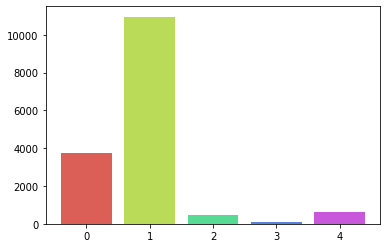

In [63]:
# category별 시각화 > 대분류
import matplotlib.pyplot as plt

colors = sns.color_palette('hls',len(category_A))
plt.bar(category_A['대분류'], category_A['ID'], color=colors)
# plt.title("Big Category")
# plt.ylabel("n_items")
plt.show()

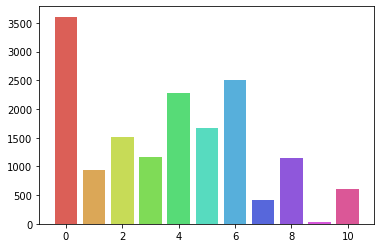

In [64]:
# '중분류'로 groupby
category_B = train.groupby(['중분류'])['ID'].count().reset_index()

# category별 시각화 > 중분류
colors = sns.color_palette('hls',len(category_B))
plt.bar(category_B['중분류'], category_B['ID'], color=colors)
# plt.title("Middle Category")
# plt.ylabel("n_items")
plt.show()

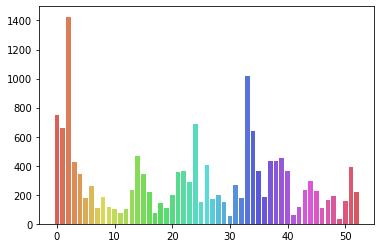

In [65]:
# '소분류'로 groupby
category_C = train.groupby(['소분류'])['ID'].count().reset_index()

# category별 시각화 > 소분류
colors = sns.color_palette('hls',len(category_C))
plt.bar(category_C['소분류'], category_C['ID'], color=colors)
# plt.title("Small Category")
# plt.ylabel("n_items")
plt.show()

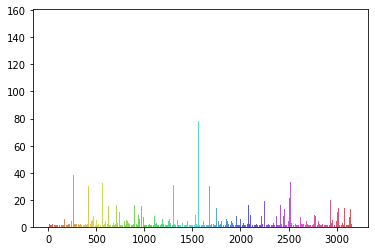

In [66]:
# '브랜드'로 groupby
category_D = train.groupby(['브랜드'])['ID'].count().reset_index()

# category별 시각화 > 소분류
colors = sns.color_palette('hls',len(category_D))
plt.bar(category_D['브랜드'], category_D['ID'], color=colors)
# plt.title("Brands")
# plt.ylabel("n_items")
plt.show()

##의미가 크게 없는 데이터인듯

# Category별 keywords 데이터와 mapping

In [36]:
keywords.head()

,Unnamed: 0,제품,KEYWORD2
0,0,B002-03509-00001,['콜라겐']
1,1,B002-02376-00001,NaN
2,2,B002-03735-00001,"['주요', '감소', '주요', '감소', '주요', '감소']"
3,3,B002-03735-00003,NaN
4,4,B002-02769-00001,"['주요', '감소']"


In [67]:
category = train2[['ID','제품','대분류','중분류','소분류','브랜드']]
key_cat = pd.merge(category, keywords, on='제품').drop(['Unnamed: 0'],axis=1)
key_cat.rename(columns = {'KEYWORD2' : 'keywords'}, inplace = True)
key_cat

,ID,제품,대분류,중분류,소분류,브랜드,keywords
0,0,B002-00001-00001,B002-C001-0002,B002-C002-0007,B002-C003-0038,B002-00001,['발림']
1,12,B002-00003-00009,B002-C001-0001,B002-C002-0001,B002-C003-0003,B002-00003,"['주요', '감소']"
2,16,B002-00005-00001,B002-C001-0002,B002-C002-0006,B002-C003-0032,B002-00005,NaN
3,17,B002-00005-00002,B002-C001-0002,B002-C002-0006,B002-C003-0032,B002-00005,NaN
4,19,B002-00005-00004,B002-C001-0002,B002-C002-0006,B002-C003-0032,B002-00005,NaN
...,...,...,...,...,...,...,...
10476,15877,B002-03798-00049,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-03798,NaN
10477,15882,B002-03798-00054,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-03798,NaN
10478,15883,B002-03798-00055,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-03798,NaN
10479,15887,B002-03799-00004,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-03799,NaN


In [74]:
# 대분류별 키워드
key_super = key_cat.copy()
key_super = key_super.dropna()
key_super = key_super.groupby('대분류')['keywords'].apply(list).reset_index(name='key_by_cat')
key_super.to_csv('key_super.csv', index=False)
key_super

,대분류,key_by_cat
0,B002-C001-0001,"[['주요', '감소'], ['주요'], ['주요', '주요', '주요'], ['주..."
1,B002-C001-0002,"[['발림'], ['발림'], ['거품'], ['발림'], ['손소독제'], ['거..."
2,B002-C001-0003,"[['스팀', '건조'], ['전용'], ['목끈', '목끈'], ['올인원', '..."
3,B002-C001-0004,"[['백화점'], ['발림'], ['발림', '발림', '발림', '겸용', '발림..."
4,B002-C001-0005,"[['알레르기'], ['알레르기', '알레르기'], ['알레르기', '알레르기', ..."


In [77]:
# 중분류별 키워드
key_base = key_cat.copy()
key_base = key_base.dropna()
key_base = key_base.groupby('중분류')['keywords'].apply(list).reset_index(name='key_by_cat')
key_base.to_csv('key_base.csv', index=False)
key_base.head()

,중분류,key_by_cat
0,B002-C002-0001,"[['주요', '감소'], ['주요'], ['주요', '주요', '주요'], ['주..."
1,B002-C002-0002,"[['뚜왈렛'], ['리필'], ['세트'], ['수세미'], ['공장'], ['가..."
2,B002-C002-0003,"[['아로마', '부스터'], ['거품', '거품', '거품'], ['세트', '바..."
3,B002-C002-0004,"[['칫솔'], ['칫솔', '칫솔', '칫솔'], ['칫솔', '칫솔', '칫솔'..."
4,B002-C002-0005,"[['데코', '화장지'], ['화장지'], ['데코', '점보롤'], ['대형']..."


In [78]:
# 소분류별 키워드
key_sub = key_cat.copy()
key_sub = key_sub.dropna()
key_sub = key_sub.groupby('소분류')['keywords'].apply(list).reset_index(name='key_by_cat')
key_sub.to_csv('key_sub.csv', index=False)
key_sub.head()

,소분류,key_by_cat
0,B002-C003-0001,"[['주요'], ['주요', '감소'], ['주요'], ['콜라겐'], ['주요',..."
1,B002-C003-0002,"[['주요', '주요'], ['주요', '충족', '주요', '주요', '주요'],..."
2,B002-C003-0003,"[['주요', '감소'], ['주요'], ['주요', '분무', '주요'], ['주..."
3,B002-C003-0004,"[['주요', '주요'], ['주요', '주요'], ['주요'], ['주요'], [..."
4,B002-C003-0005,"[['주요', '주요', '주요'], ['주요'], ['주요'], ['주요', '주..."


In [80]:
# 브랜드별 키워드
key_brands = key_cat.copy()
key_brands = key_brands.dropna()
key_brands = key_brands.groupby('브랜드')['keywords'].apply(list).reset_index(name='key_by_cat')
key_brands.to_csv('key_brands.csv', index=False)
key_brands.head()

,브랜드,key_by_cat
0,B002-00001,[['발림']]
1,B002-00003,"[['주요', '감소']]"
2,B002-00005,[['발림']]
3,B002-00008,[['주요']]
4,B002-00015,"[['주요', '주요', '주요']]"


# 브랜드 언급량이 매출에 민감하게 작용하는 소분류 품목 찾기

In [134]:
# 필용한 data import
sales = pd.read_csv('sales.csv')
brands = pd.read_csv('brand_keyword_cnt.csv')

## 소분류별 매출 동향

In [135]:
sales.head()

,ID,제품,대분류,중분류,소분류,브랜드,2022-01-01,2022-01-02,2022-01-03,2022-01-04,...,2023-03-26,2023-03-27,2023-03-28,2023-03-29,2023-03-30,2023-03-31,2023-04-01,2023-04-02,2023-04-03,2023-04-04
0,0,B002-00001-00001,B002-C001-0002,B002-C002-0007,B002-C003-0038,B002-00001,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,B002-00002-00001,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-00002,0,0,0,0,...,0,0,0,22400,67200,44800,0,0,44800,0
2,2,B002-00002-00002,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-00002,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,B002-00002-00003,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-00002,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,B002-00003-00001,B002-C001-0001,B002-C002-0001,B002-C003-0003,B002-00003,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [136]:
date = sales.columns[6:]
sell_per_sub = sales.groupby(['소분류']).sum()[date]
sell_per_sub = sell_per_sub.reset_index()
display(sell_per_sub.head())
print(len(sell_per_sub))

,소분류,2022-01-01,2022-01-02,2022-01-03,2022-01-04,2022-01-05,2022-01-06,2022-01-07,2022-01-08,2022-01-09,...,2023-03-26,2023-03-27,2023-03-28,2023-03-29,2023-03-30,2023-03-31,2023-04-01,2023-04-02,2023-04-03,2023-04-04
0,B002-C003-0001,97159410,87481800,95045900,111106590,132858720,141810520,142048580,127412860,130145590,...,12087180,12215460,10558040,105954970,106040810,103699420,87475820,83105550,113575490,115889500
1,B002-C003-0002,159706910,140996250,139486170,144045860,182718130,207857010,214963380,181128100,171532310,...,10241930,9574350,10320010,156708020,142696730,139971510,119364490,153888770,131784570,173674100
2,B002-C003-0003,551054120,570469100,549120560,562585230,631569550,662114050,628738560,567200280,618919310,...,32088800,33300100,31201700,183927670,187527550,151071260,154200470,161162080,175497720,215664300
3,B002-C003-0004,121293940,95394720,80543120,89198900,111976720,117764940,123017350,137464020,142623080,...,3744200,3691800,4362600,132405600,110995770,121924490,97500160,104230890,121675770,119487210
4,B002-C003-0005,42040950,39798310,37590050,33593010,42831340,49059590,49354260,46883010,45759160,...,3237900,3174900,3037200,27715190,33260870,30314660,29622380,26266520,29599250,34206890


53


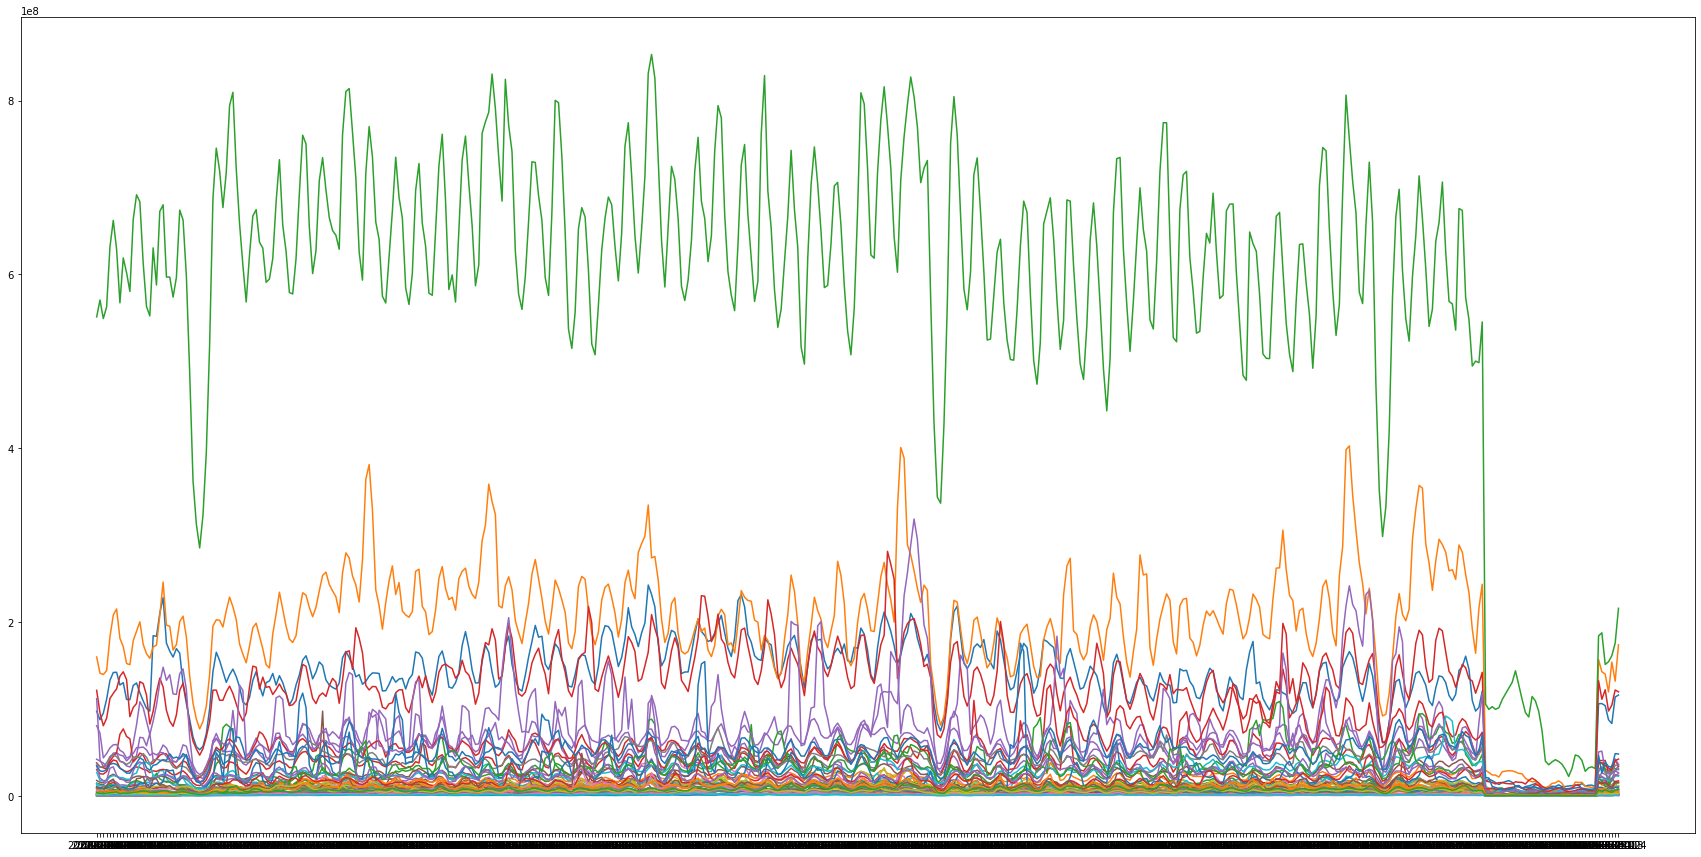

In [137]:
import matplotlib.pyplot as plt
import seaborn as sns

name_sub = sell_per_sub['소분류']
temp = sell_per_sub.T.iloc[1:]
temp = temp.rename(columns=dict(zip(temp.columns, name_sub)))
plt.figure(figsize=(30,15))
plt.plot(temp);